## TASK-1 Prediction using Supervised ML

### Problem Statement:

    
    Predict the percentage of an student based on the no. of study hours.

### Author: Aakash Shyam Pal

In [1]:
# Python packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Loading dataset

dataset = pd.read_csv("http://bit.ly/w-data")

In [3]:
# Displaying dataset

dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


    --> This dataset consist of 25 rows and 2 columns.

In [4]:
# Duplicate value

dataset[dataset.duplicated()]

,Hours,Scores


    --> No Duplicate record found in dataset.

In [5]:
# Shape of dataset

dataset.shape   

(25, 2)

    --> The shape of the dataset is 25, 2.

In [6]:
# Top 5 records of dataset.

dataset.head()  

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Last 5 records of dataset.

dataset.tail()  

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
# Datatype of each feature.

dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
# Missing values.

dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

    ---> No Missing Values.

In [10]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


    --> Their is no missing value in the dataset.
    --> Minimum Study Hours is 1.10 whereas Maximum Study Hours is 9.20.
    --> Minimum Score is 17 whereas Maximum Score is 95.

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


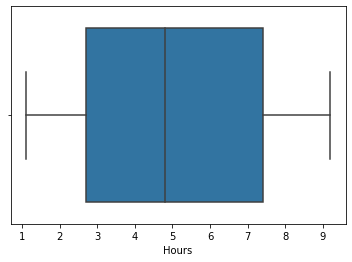

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


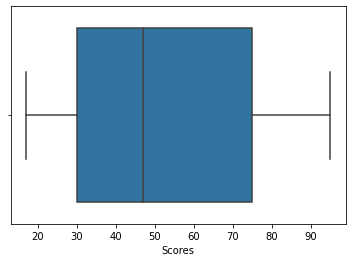

In [11]:
# Outliers

for i in dataset.columns:
    sns.boxplot(dataset[i])
    plt.xlabel(i)
    plt.show()

    --> Their is no outlier in the dataset.

    --> Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

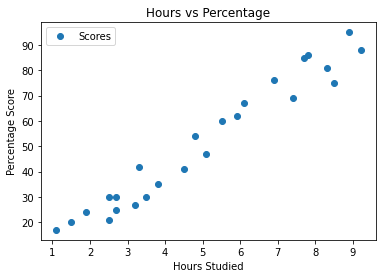

In [12]:
# Plotting the distribution of scores

dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

    --> From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

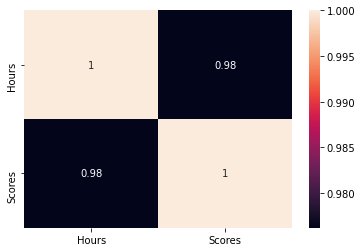

In [13]:
# correlation

sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [14]:
# Splitting Data into Independent and Dependent Variable

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [15]:
# Splitting Data into training and testing set.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.shape,  x_test.shape,   y_train.shape,  y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [17]:
# Model Traing 

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 


LinearRegression()

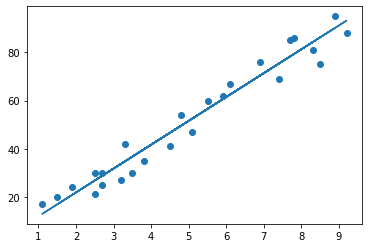

In [18]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

In [19]:
# Predicting the scores

y_pred = regressor.predict(x_test)

In [20]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [22]:
# Testing for 9.25 study hour

hours = [9.25]
own_pred = regressor.predict([hours])
print("No of Study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Study Hours = [9.25]
Predicted Score = 93.69173248737535


    --> According to the linear regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.